In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('house_rental_data.csv.txt')

In [3]:
data.tail(10)

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
635,639,1889.298,18,21,3,2,2,70000
636,640,1266.648,6,7,3,2,2,40000
637,641,1707.840,9,9,4,2,2,60000
638,642,1707.840,9,15,3,2,2,80000
639,643,2846.400,5,12,4,2,2,138888
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000
644,648,1376.946,6,7,3,2,1,36000


In [4]:
data.describe()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,325.159690,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,187.312152,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,1.000000,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,164.000000,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,326.000000,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,487.000000,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,648.000000,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [5]:
#the important features that i selected here are Sqft,TotalFloor,Bedroom,Bathroom,Price
#data cleaning
X= data.iloc[:,[1,3,4,6,7]]

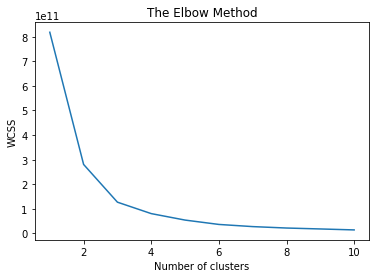

In [6]:
#elbows method to determine the optimal value of k number of clusters
#finding the value of k
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
#n==3 as per wcss score
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 4)
y_kmeans = kmeans.fit_predict(X)

In [8]:
print(y_kmeans)

[2 0 2 2 2 1 2 2 2 0 2 2 2 2 2 0 2 2 0 2 1 0 2 0 1 0 1 1 2 2 0 0 2 2 2 2 2
 2 1 2 1 2 2 0 0 2 2 0 1 2 0 0 2 2 1 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2
 2 0 2 2 0 2 2 2 2 2 2 2 1 2 0 0 0 0 2 0 2 2 0 0 2 0 0 2 0 1 1 0 0 2 2 0 2
 2 0 0 0 2 1 2 2 2 2 2 0 0 0 2 2 0 2 2 0 2 0 2 0 2 2 0 0 0 1 2 2 2 2 2 0 1
 2 2 0 0 2 2 2 2 2 2 2 2 0 2 2 1 2 0 0 0 2 2 2 0 0 0 2 0 0 2 2 2 2 2 1 2 2
 2 2 2 2 0 2 2 0 2 2 0 0 2 2 2 2 0 2 2 2 2 2 2 0 0 2 2 0 2 2 2 2 0 2 0 2 2
 0 2 0 2 2 2 0 2 0 0 0 0 2 2 2 2 2 0 2 2 1 2 0 2 1 2 0 2 0 2 0 2 2 2 0 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 0 2 2 2 2 2 0 2 1 0 2 0 2 2 0 2 2 0
 0 0 0 1 0 2 2 0 2 2 0 2 2 2 0 2 2 2 2 2 0 0 0 2 2 2 1 0 2 0 2 1 2 2 2 0 2
 1 0 2 2 2 2 0 2 2 2 2 2 2 2 1 2 2 2 2 0 2 2 0 2 0 0 0 2 0 2 2 2 2 0 0 2 2
 2 2 2 2 2 2 2 0 2 2 0 0 0 2 2 0 0 2 2 2 2 0 0 2 2 0 0 2 2 2 2 0 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 0 0 0 1 2 2 0 0 2 2 0 1 2 2 0 2 2 2 0 1
 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 1 2 1 0 0 0 2 0 2 2 2 2 2 0
 0 0 0 0 2 2 2 2 2 2 1 0 

In [9]:
#Storing cluster to which the house belongs along with the data
data['cluster_group'] = y_kmeans
data.head(10)

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,cluster_group
0,1,1177.698,2,7,2,2,2,62000,2
1,2,2134.800,5,7,4,2,2,78000,0
2,3,1138.560,5,7,2,2,1,58000,2
3,4,1458.780,2,7,3,2,2,45000,2
4,5,967.776,11,14,3,2,2,45000,2
5,6,1127.886,11,12,4,2,2,148000,1
6,7,1352.040,5,7,3,2,1,58000,2
7,8,757.854,5,14,1,0,1,48000,2
8,9,1152.792,10,12,3,2,2,45000,2
9,10,1423.200,4,5,4,2,2,65000,0
